<a href="https://colab.research.google.com/github/MadhuRamiah/MNIST/blob/master/MNIST_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [0]:
uploaded = files.upload()

Saving test.csv to test.csv


In [0]:
import io
df = pd.read_csv("train.csv")

In [0]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import gc
import cv2 as cv
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten, BatchNormalization,regularizers
from keras.layers import Conv2D,MaxPool2D
from keras import regularizers, optimizers

In [0]:
def one_hot(Y):
    values=[0,1,2,3,4,5,6,7,8,9]
    new_array=np.zeros((Y.shape[0],10))
    index=0
    for y in Y:
        new_array[index][y]=1.0
        index+=1
    print(new_array)
    return new_array

In [6]:
X=df.iloc[:,1:]
Y=one_hot(df['label'])

# Rescaling the features
from sklearn.preprocessing import scale

X=scale(X)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [7]:
print (X.shape)
Z=np.ndarray(shape=(X.shape[0],28,28),dtype=float)
for i in range(0,len(X)):
    x = np.reshape(X[i],(-1,28))
    Z[i]=np.array(x)
print (Z.shape)

(42000, 784)
(42000, 28, 28)


True

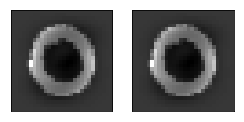

In [11]:
fig=plt.figure(figsize=(4,4))
ax=fig.add_subplot(1,2,1,xticks=[],yticks=[])
plt.imshow(Z[1],cmap='gray')
fig.savefig("zero.png")

#Normalizing
normalizedImg = np.zeros((28,28))
normalizedImg = cv.normalize(Z[1],  normalizedImg, 0, 255, cv.NORM_MINMAX)
ax=fig.add_subplot(1,2,2,xticks=[],yticks=[])
plt.imshow(normalizedImg,cmap='gray')

#Histogram equalization
img = cv.imread("zero.png",0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv.imwrite('res.png',res)

In [0]:
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.1,random_state=101)
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [0]:
model=Sequential()
model.add(Conv2D(28,(5,5),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(28,(5,5)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(5,5),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(5,5)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

"""model.add(Conv2D(112,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(112,(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))"""

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

In [29]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
activation_22 (Activation)   (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 12, 12, 32)        0         
__________

In [40]:
optimizer = optimizers.sgd(lr=0.1, decay=0, momentum=0, nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50,batch_size=30,validation_data=(x_test,y_test),shuffle=True)

Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 10s 274us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0234 - val_acc: 0.9945
Epoch 2/50
37800/37800 [==============================] - 9s 236us/step - loss: 0.0019 - acc: 0.9995 - val_loss: 0.0221 - val_acc: 0.9948
Epoch 3/50
37800/37800 [==============================] - 9s 235us/step - loss: 0.0016 - acc: 0.9996 - val_loss: 0.0223 - val_acc: 0.9940
Epoch 4/50
37800/37800 [==============================] - 9s 232us/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0211 - val_acc: 0.9950
Epoch 5/50
37800/37800 [==============================] - 9s 233us/step - loss: 0.0012 - acc: 0.9998 - val_loss: 0.0236 - val_acc: 0.9948
Epoch 6/50
37800/37800 [==============================] - 9s 236us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 0.0214 - val_acc: 0.9952
Epoch 7/50
37800/37800 [==============================] - 9s 234us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0218 - 

In [41]:
test_data=pd.read_csv("test.csv")
test_data=scale(test_data)

Z_test=np.ndarray(shape=(test_data.shape[0],28,28),dtype=float)
for i in range(0,len(test_data)):
    x = np.reshape(test_data[i],(-1,28))
    Z_test[i]=np.array(x)
print (Z_test.shape)

test_data=test_data.reshape(len(Z_test),28,28,1)
test_pred=model.predict_classes(test_data)

test=pd.read_csv("test.csv")
submissions=pd.DataFrame({'ImageId':test.index.values+1,'Label':test_pred})
submissions.to_csv("MNIST_cnn9.csv",index=False)

(28000, 28, 28)
